### Importin libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### data Preprocessing

#### Training image Preprocessing 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


#### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[133.   125.   138.  ]
   [122.75 114.75 127.75]
   [120.75 112.75 125.75]
   ...
   [164.25 160.25 174.25]
   [149.5  145.5  159.5 ]
   [152.5  148.5  162.5 ]]

  [[130.5  122.5  135.5 ]
   [141.   133.   146.  ]
   [129.25 121.25 134.25]
   ...
   [150.25 146.25 160.25]
   [154.5  150.5  164.5 ]
   [171.75 167.75 181.75]]

  [[129.25 121.25 134.25]
   [125.5  117.5  130.5 ]
   [139.75 131.75 144.75]
   ...
   [168.5  164.5  178.5 ]
   [160.   156.   170.  ]
   [141.25 137.25 151.25]]

  ...

  [[117.5  109.5  122.5 ]
   [115.5  107.5  120.5 ]
   [123.5  115.5  128.5 ]
   ...
   [153.   147.   159.  ]
   [146.5  140.5  152.5 ]
   [151.   145.   157.  ]]

  [[110.75 102.75 115.75]
   [115.75 107.75 120.75]
   [110.75 102.75 115.75]
   ...
   [158.25 152.25 164.25]
   [170.25 164.25 176.25]
   [147.75 141.75 153.75]]

  [[119.   111.   124.  ]
   [123.5  115.5  128.5 ]
   [115.25 107.25 120.25]
   ...
   [147.25 141.25 153.25]
   [159.75 153.75 165.75]
   [166.25 160.25 17

### To avoid overfitting
1. Choose small learning rate default is 0.001 we are taking 0.0001
2. There may be chance of underfitting, so increase number of neurons
3. Add more Convolution layer to extract more features from images there may be possibilty that model unable to capture relevent feature or model is confusing due to lack of feature so feed with more feature

### Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

#### Building Convolution Layer
#####  -------------> https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters = 128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # to avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [44]:
training_history = model.fit(x= training_set,validation_data= validation_set,epochs= 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1152s 524ms/step - accuracy: 0.3972 - loss: 2.1431 - val_accuracy: 0.8287 - val_loss: 0.5482
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.8366 - loss: 0.5153

In [21]:
from keras.models import load_model

In [25]:
# Load the model
model = load_model('trained_model.h5')

# Reset optimizer state
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### Model evaluation

In [26]:
# model evolution on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 235s 107ms/step - accuracy: 0.9968 - loss: 0.0113


In [27]:
print(train_loss,train_acc)

0.011748379096388817 0.9965858459472656


In [28]:
# Model evolution in validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 60s 108ms/step - accuracy: 0.9746 - loss: 0.0868


In [29]:
print(val_loss,val_acc)

0.08082804083824158 0.9761552214622498


### Saving Model

In [ ]:
model.save("trained_model.h5")  # file has large size


In [ ]:
model.save("trained_model.keras") # file has small size

In [35]:
training_history.history

NameError: name 'training_history' is not defined

In [36]:
# Recording History in JSON

import json
with open('history.json', 'w') as f:
    json.dump(training_history.history, f)

NameError: name 'training_history' is not defined

### Accuracy Visualization

In [37]:
epochs = [i for i in range(1,11)]

plt.plot(epochs, training_history.history['accuracy'],color = 'red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color = 'blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

### Some other metricsfor model evaluation

In [41]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [43]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 61s 110ms/step


array([[1.0000000e+00, 8.2314620e-11, 2.3523628e-13, ..., 2.9741601e-16,
        5.7137396e-16, 7.3760739e-15],
       [1.0000000e+00, 4.6171768e-11, 3.2138729e-11, ..., 4.1179350e-15,
        9.0066555e-15, 1.7337618e-14],
       [1.0000000e+00, 1.1651178e-12, 4.4684274e-14, ..., 1.0113771e-18,
        2.7870332e-17, 1.8717914e-15],
       ...,
       [3.1928183e-15, 1.2007658e-17, 7.1916632e-13, ..., 3.4512424e-17,
        3.2952702e-18, 1.0000000e+00],
       [1.9121592e-12, 7.9199815e-16, 1.3005174e-11, ..., 6.9563004e-15,
        8.9375836e-16, 1.0000000e+00],
       [5.8348599e-17, 7.5444119e-19, 7.8860054e-16, ..., 7.3617787e-19,
        2.1156347e-16, 1.0000000e+00]], dtype=float32)

In [45]:
y_pred.shape

(17572, 38)

In [46]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [47]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [48]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

In [49]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [51]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

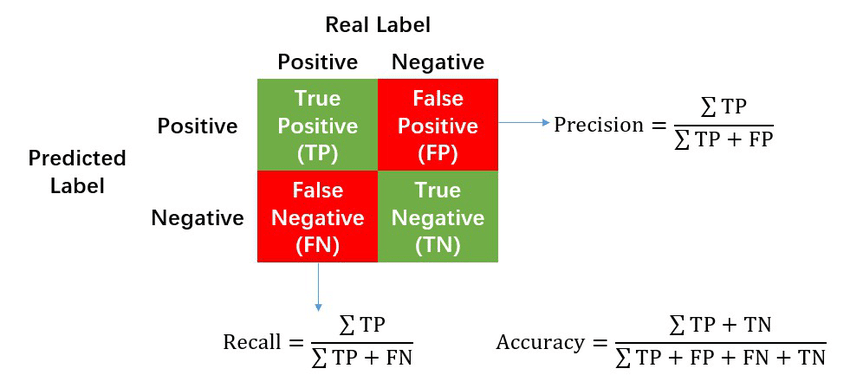

In [52]:
from sklearn.metrics import classification_report

In [53]:
classification_report(y_true,predicted_categories,target_names= class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.99      0.98      0.98       504\n                                 Apple___Black_rot       0.99      0.98      0.99       497\n                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440\n                                   Apple___healthy       0.98      0.97      0.98       502\n                               Blueberry___healthy       0.98      0.98      0.98       454\n          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421\n                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.95      0.92       410\n                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.96      